In [65]:
import datetime, os,pandas as pd,glob, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d8=pd.read_csv('2020-05-28.csv',dtype='str') #6323992  
#d9=pd.read_csv('2020-05-29.csv',dtype='str') #6323992  
#'dt_texte', 'dt_unix', 'station', 'status', 'voie', 'vitesse', 'longueur', 'statutTR'
#lstSt=df['station'].unique()

In [66]:
cdSt=pd.read_csv('cdSt.csv',dtype='str')
cdSt['code']=cdSt['code'].str.pad(4,fillchar='0')
cdSt=cdSt.set_index('code')
cdSt.columns=['st3']
d8['dt']=pd.to_datetime(d8['dt_unix'],format='%Y-%m-%dT%H:%M:%S.%f')
d8=d8.join(cdSt, on='station')[['st3', 'status', 'voie', 'vitesse', 'longueur','dt']]
d8['h']=d8['dt'].dt.hour
d8['jr']=d8['dt'].dt.day
d8['mn']=d8['dt'].dt.minute
d8['ax']=d8['st3'].str[1]
axesExclus=['2','6',np.NaN]
d8=d8[~d8['ax'].isin(axesExclus)]
d8.loc[(d8['voie'].isnull())&(d8['status']=='0'),'status']='1'
d8['ts']=((d8['dt']-datetime.datetime(2020,5,28)).dt.total_seconds())+0.01
d8['tr']=np.floor((d8['ts']-np.floor(d8['ts']/6)*6))
d8['lt']=(d8['ts']//6).astype('int')
d8=d8[d8['lt']>-1]
d8=d8[(d8['lt']>-1)&(d8['lt']<13200)]

In [67]:
ltu=pd.DataFrame(list(range(max(d8['lt']))))
ltu.columns=['lt']
f8=pd.concat([d8,ltu], sort=False)
f8=f8.groupby(['lt','st3'])['dt'].count().unstack('st3')

In [68]:
g8=f8.isnull().sum().sort_values()
g8.name='mq'
h8=d8[d8['status']=='1'].groupby('st3')['dt'].count().astype('int')
h8.name='v1'
j8=d8[d8['status']=='2'].groupby('st3')['dt'].count().astype('int')
j8.name='v2'
lst=pd.concat([g8,h8,j8],axis=1,sort=False).fillna(0).astype('int')
lst['nl']=lst ['mq'] +lst['v2']

In [70]:
lst.sort_values('nl')

,mq,v1,v2,nl
M8G,339,3579,192,531
M8K,485,3535,274,759
M8J,348,3555,453,801
M8d,766,3662,78,844
M8H,829,3552,169,998
M8B,747,3512,361,1108
M8O,713,4015,428,1141
M8k,1098,1513,217,1315
M8I,764,3555,656,1420
M8i,1438,1513,142,1580


In [107]:

s8=d8.groupby(['ax','st3','lt'])['jr'].count().reset_index()
len(s8) # 1387380  3:1717207

703085

In [100]:
d9['ts']=((d9['dt']-datetime.datetime(2020,5,29)).dt.total_seconds())-0.01
d9['lt']=d9['ts']//6
d9=d9[d9['status']=='0']
s9=d9.groupby(['ax','st3','lt'])['jr'].count().reset_index()
len(s9) # 1387380  3:1717207

919613

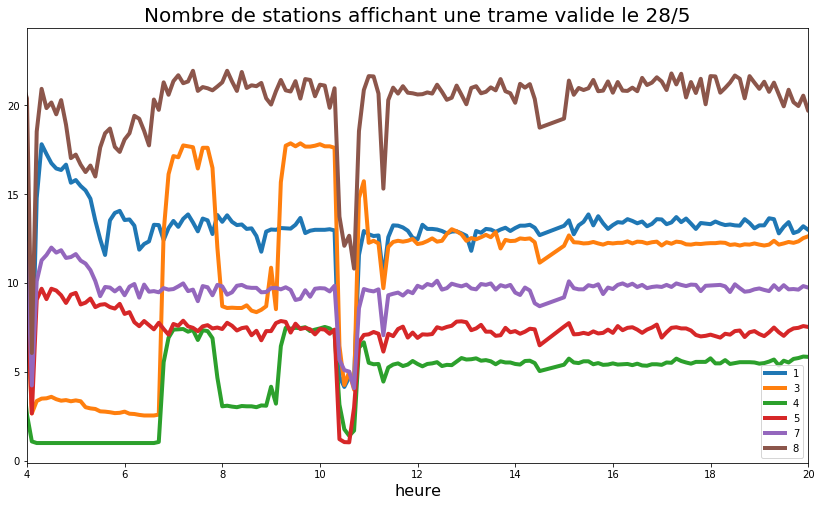

In [102]:
sm=s8.groupby(['lt','ax'])['st3'].count().reset_index()
sm['ct']=(sm['lt']//60)/10
sc=sm.groupby(['ct','ax'])['st3'].mean().unstack('ax')
fig,ax=plt.subplots(figsize=(14,8))
w=sc.plot(ax=ax,linewidth=4)
ax.set_xlim([4,20])
ax.set_xlabel('heure',fontsize=16)
ax.set_title('Nombre de stations affichant une trame valide le 28/5',fontsize=20)
w=ax.legend()

In [76]:
max(sm['lt'])-min(sm['lt'])

14408.0

In [56]:
n8=d8[(d8['voie'].isnull())&(d8['status']=='0')&(d8['ts']>0)][['st3','ts']]

In [27]:
(n8['ts']%12).round(3).value_counts()

0.0    134337
6.0    133940
7.0        62
1.0        11
2.0         6
Name: ts, dtype: int64

In [109]:
d8['dd']=(d8['dt']-d8['dtu']).dt.total_seconds()

In [114]:
dd=d8[d8['dd']==0]

In [116]:
dd.groupby('station').first()

,dt_texte,dt_unix,status,voie,vitesse,longueur,statutTR,dt,dtu,h,jr,mn,hu,jru,mnu,dd
station,,,,,,,,,,,,,,,,
0000,Wed May 27 22:45:00 2020,2020-05-27T22:45:00,0,0,75.0,3.9,@,2020-05-27 22:45:00,2020-05-27 22:45:00,22.0,27.0,45.0,22,27,45,0.0
0001,Wed May 27 22:45:12 2020,2020-05-27T22:45:12,0,1,78.0,3.7,B,2020-05-27 22:45:12,2020-05-27 22:45:12,22.0,27.0,45.0,22,27,45,0.0
0002,Wed May 27 22:45:12 2020,2020-05-27T22:45:12,0,1,103.0,4.6,@,2020-05-27 22:45:12,2020-05-27 22:45:12,22.0,27.0,45.0,22,27,45,0.0
0003,Wed May 27 22:45:12 2020,2020-05-27T22:45:12,0,0,72.0,4.2,B,2020-05-27 22:45:12,2020-05-27 22:45:12,22.0,27.0,45.0,22,27,45,0.0
0004,Wed May 27 22:45:00 2020,2020-05-27T22:45:00,2,NaN,NaN,NaN,NaN,2020-05-27 22:45:00,2020-05-27 22:45:00,22.0,27.0,45.0,22,27,45,0.0
0005,Wed May 27 22:45:36 2020,2020-05-27T22:45:36,0,1,119.0,4.1,J,2020-05-27 22:45:36,2020-05-27 22:45:36,22.0,27.0,45.0,22,27,45,0.0
0006,Wed May 27 22:45:00 2020,2020-05-27T22:45:00,0,1,78.0,3.2,J,2020-05-27 22:45:00,2020-05-27 22:45:00,22.0,27.0,45.0,22,27,45,0.0
0007,Wed May 27 22:45:06 2020,2020-05-27T22:45:06,0,0,72.0,3.0,J,2020-05-27 22:45:06,2020-05-27 22:45:06,22.0,27.0,45.0,22,27,45,0.0
0008,Wed May 27 22:45:12 2020,2020-05-27T22:45:12,0,0,92.0,3.9,J,2020-05-27 22:45:12,2020-05-27 22:45:12,22.0,27.0,45.0,22,27,45,0.0


In [50]:
lS8=d8.groupby(['station', 'status'])['dt_texte'].count().unstack('status').iloc[:,0:2].sort_values('0',ascending=False)
lS9=d9.groupby(['station', 'status'])['dt_texte'].count().unstack('status').iloc[:,0:2].sort_values('0',ascending=False)

In [70]:
dg['dtu']=pd.to_datetime(dg['dt_unix'],format='%Y-%m-%dT%H:%M:%S.%f')

In [79]:
dg=d8[d8['station']=='0039'].copy()
dg['dt']=pd.to_datetime(dg['dt_texte'],format='%c')
dg['h']=dg['dt'].dt.hour
dg['jr']=dg['dt'].dt.day
dg['mn']=dg['dt'].dt.minute
dg['dtu']=pd.to_datetime(dg['dt_unix'],format='%Y-%m-%dT%H:%M:%S.%f')

In [80]:
dg9=d9[d9['station']=='0039']

In [91]:
dv=dg[(dg['voie']=='2')&(dg['h']==16)&(dg['mn']==14)][['dt', 'dtu','mn',  'vitesse', 'longueur']].sort_values('dtu')

In [85]:
dv['dtu'].dt.minute.value_counts().sort_values()

15    21
14    26
Name: dtu, dtype: int64

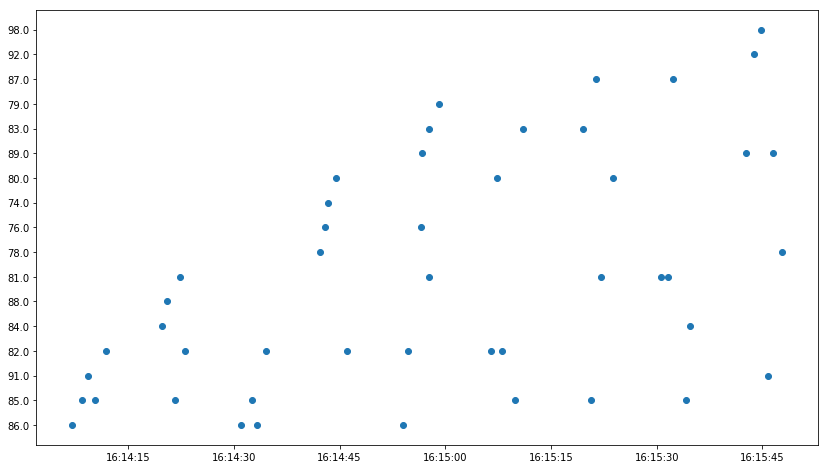

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(figsize=(14,8))
ax.plot(dv['dtu'],dv['vitesse'],'o')

In [37]:
td=dg['dt_texte'].value_counts().sort_values()

In [39]:
#td.value_counts()

In [47]:
dg['jr'].value_counts()

28    122496
27       508
Name: jr, dtype: int64